In [2]:
import folium
import json
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from folium.features import DivIcon

In [15]:
micro_df = pd.read_csv('data\\마이크로_데이터\\2020년 노인실태조사_ver2.0(최종공개용).csv')
micro_df.head()

,PID,HNO,AREA,EDM,ANS_TYPE,ANS_SUB1,ANS_SUB2,ANS_SUB3,S9_0,S9_2,...,RES_YY,RES_MM,RES_AGE,RES_MAR,RES_EDU1,RES_EDU2,RES_YN,RES_SUB,f_wgt1,s_wgt1
0,7501,1,35,2,0,99,999,1,0,99,...,1952,10,67,1,4,9,1,9,393.325736,0.512734
1,7601,1,35,2,0,99,999,1,0,99,...,1951,12,68,3,2,0,1,9,393.325736,0.512734
2,7802,2,23,1,0,99,999,1,1,1,...,1954,3,66,2,5,12,1,9,587.163656,0.765418
3,7801,1,23,1,0,99,999,1,0,99,...,1954,1,66,2,5,12,1,9,640.643430,0.835133
4,8001,1,35,1,0,99,999,1,0,99,...,1951,12,68,3,3,6,1,9,493.769927,0.643671


In [5]:
len(micro_df)

10097

In [6]:
metadata = {
    'AREA': '지역',
    'EDM': '동부/읍면부',
    'D3':'여가·문화 활동 참여 여부',
    'D3_1_1': '여가활동 1순위',
    'D3_1_2': '여가활동 2순위',
    'D3_2': '여가활동 안 한 이유',
    'D3_2_7_etc': '여가활동 안 한 이유(기타)',
    'D4_1': '희망 여가활동 1순위',
    'D4_2': '희망 여가활동 2순위',
    'D5': '교육 참여 여부',
    'D5_1': '교육 참여 영역',
    'D5_1_7_etc': '교육 참여 영역(기타)',
    'D10_1': '희망 활동_자원봉사',
    'D10_2': '희망 활동_학습',
    'D10_3': '희망 활동_여가',
    'D10_4': '희망 활동_종교',
    'D10_5': '희망 활동_정치사회',
    'D10_6': '희망 활동_친목',
    'D11_1_1': '경로당 이용 여부',
    'D11_1_2': '노인복지관 이용 여부',
    'D11_1_3': '사회복지관 이용 여부',
    'D11_1_4': '노인교실 이용 여부',
    'D11_1_5': '공공 여가문화시설 이용 여부',
    'D11_1_6': '민간문화시설 이용 여부',
    'D11_3_1_1': '경로당 이용 이유_1순위',
    'D11_3_1_2': '경로당 이용 이유_2순위',
    'D11_3_1_9_etc': '경로당 이용 이유(기타)',
    'D11_3_2_1': '노인복지관 이용 이유_1순위',
    'D11_3_2_2': '노인복지관 이용 이유_2순위',
    'D11_3_2_9_etc': '노인복지관 이용 이유(기타)',
    'D11_3_3_1': '사회복지관 이용 이유_1순위',
    'D11_3_3_2': '사회복지관 이용 이유_2순위',
    'D11_3_3_9_etc': '사회복지관 이용 이유(기타)',
    'D11_3_4_1': '노인교실 이용 이유_1순위',
    'D11_3_4_2': '노인교실 이용 이유_2순위',
    'D11_3_4_9_etc': '노인교실 이용 이유(기타)',
    'D11_3_5_1': '공공 여가문화시설 이용 이유_1순위',
    'D11_3_5_2': '공공 여가문화시설 이용 이유_2순위',
    'D11_3_5_9_etc': '공공 여가문화시설 이용 이유(기타)',
    'D11_3_6_1': '민간문화시설 이용 이유_1순위',
    'D11_3_6_2': '민간문화시설 이용 이유_2순위',
    'D11_3_6_9_etc': '민간문화시설 이용 이유(기타)',
    'D11_4_1': '경로당 향후 이용 의향',
    'D11_4_2': '노인복지관 향후 이용 의향',
    'D11_4_3': '사회복지관 향후 이용 의향',
    'D11_4_4': '노인교실 향후 이용 의향',
    'D11_4_5': '공공 여가문화시설 향후 이용 의향',
    'D11_4_6': '민간문화시설 향후 이용 의향',
}


In [7]:
micro_df_ = micro_df[metadata.keys()]

In [8]:
micro_df_ = micro_df_.rename(columns = metadata)
micro_df_ = micro_df_[micro_df_['지역'] == 31]
micro_df_

,지역,동부/읍면부,여가·문화 활동 참여 여부,여가활동 1순위,여가활동 2순위,여가활동 안 한 이유,여가활동 안 한 이유(기타),희망 여가활동 1순위,희망 여가활동 2순위,교육 참여 여부,...,공공 여가문화시설 이용 이유(기타),민간문화시설 이용 이유_1순위,민간문화시설 이용 이유_2순위,민간문화시설 이용 이유(기타),경로당 향후 이용 의향,노인복지관 향후 이용 의향,사회복지관 향후 이용 의향,노인교실 향후 이용 의향,공공 여가문화시설 향후 이용 의향,민간문화시설 향후 이용 의향
5,31,1,1,703,802,9,,701,702,2,...,,99,99,,1,1,1,1,1,1
6,31,1,1,802,400,9,,802,400,1,...,,99,99,,1,1,1,2,2,2
7,31,1,1,607,999,9,,603,701,1,...,,99,99,,1,2,2,2,2,2
8,31,1,1,702,704,9,,701,702,2,...,,99,99,,1,1,2,2,2,2
60,31,1,1,702,801,9,,702,701,2,...,,99,99,,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9244,31,1,1,801,999,9,,701,602,2,...,,99,99,,1,1,2,2,2,2
9613,31,1,1,603,702,9,,803,603,2,...,,99,99,,2,2,1,2,1,1
9808,31,1,1,802,999,9,,601,701,2,...,,99,99,,1,2,2,2,2,2
9810,31,1,1,400,102,9,,803,102,1,...,,99,99,,2,2,2,2,2,2


In [9]:
micro_df_.columns

Index(['지역', '동부/읍면부', '여가·문화 활동 참여 여부', '여가활동 1순위', '여가활동 2순위', '여가활동 안 한 이유',
       '여가활동 안 한 이유(기타)', '희망 여가활동 1순위', '희망 여가활동 2순위', '교육 참여 여부', '교육 참여 영역',
       '교육 참여 영역(기타)', '희망 활동_자원봉사', '희망 활동_학습', '희망 활동_여가', '희망 활동_종교',
       '희망 활동_정치사회', '희망 활동_친목', '경로당 이용 여부', '노인복지관 이용 여부', '사회복지관 이용 여부',
       '노인교실 이용 여부', '공공 여가문화시설 이용 여부', '민간문화시설 이용 여부', '경로당 이용 이유_1순위',
       '경로당 이용 이유_2순위', '경로당 이용 이유(기타)', '노인복지관 이용 이유_1순위', '노인복지관 이용 이유_2순위',
       '노인복지관 이용 이유(기타)', '사회복지관 이용 이유_1순위', '사회복지관 이용 이유_2순위',
       '사회복지관 이용 이유(기타)', '노인교실 이용 이유_1순위', '노인교실 이용 이유_2순위', '노인교실 이용 이유(기타)',
       '공공 여가문화시설 이용 이유_1순위', '공공 여가문화시설 이용 이유_2순위', '공공 여가문화시설 이용 이유(기타)',
       '민간문화시설 이용 이유_1순위', '민간문화시설 이용 이유_2순위', '민간문화시설 이용 이유(기타)',
       '경로당 향후 이용 의향', '노인복지관 향후 이용 의향', '사회복지관 향후 이용 의향', '노인교실 향후 이용 의향',
       '공공 여가문화시설 향후 이용 의향', '민간문화시설 향후 이용 의향'],
      dtype='object')

In [10]:
# 현재 여가활동 이용 현황
current_activity_df = micro_df_[['지역', '여가활동 1순위', '여가활동 2순위', '여가·문화 활동 참여 여부','여가활동 안 한 이유', 
                          '여가활동 안 한 이유(기타)', '경로당 이용 여부', '노인복지관 이용 여부', 
                          '사회복지관 이용 여부', '노인교실 이용 여부', '공공 여가문화시설 이용 여부', 
                          '민간문화시설 이용 여부']]

# 희망 여가활동
desired_activity_df = micro_df_[['희망 여가활동 1순위', '희망 여가활동 2순위', '희망 활동_자원봉사', '희망 활동_학습', 
                          '희망 활동_여가', '희망 활동_종교', '희망 활동_정치사회', '희망 활동_친목']]

# 교육 참여
education_df = micro_df_[['교육 참여 여부', '교육 참여 영역', '교육 참여 영역(기타)']]

# 향후 이용 의향
future_intent_df = micro_df_[['경로당 향후 이용 의향', '노인복지관 향후 이용 의향', '사회복지관 향후 이용 의향', 
                       '노인교실 향후 이용 의향', '공공 여가문화시설 향후 이용 의향', 
                       '민간문화시설 향후 이용 의향']]

In [11]:
# 현재 여가활동 설명 (최소화)
now_act_map = {
    101: "영화",
    102: "기타 문화예술 관람",
    201: "악기/노래",
    202: "미술",
    203: "춤/무용",
    204: "기타 문화예술 참여",
    300: "스포츠 관람",
    400: "스포츠 참여",
    601: "화투/고스톱",
    602: "등산",
    603: "화초가꾸기",
    604: "독서",
    605: "낚시",
    606: "바둑/장기/체스",
    607: "교양강좌",
    608: "기타",
    702: "산책",
    703: "음악감상",
    704: "기타 휴식",
    801: "종교활동",
    802: "사회활동",
    803: "기타 활동",
    999: "비해당"
}

# 희망 여가활동 설명 (최소화)
hope_act_map = {
    101: "영화",
    102: "기타 문화예술 관람",
    201: "악기/노래",
    202: "미술",
    203: "춤/무용",
    204: "기타 문화예술 참여",
    300: "스포츠 관람",
    400: "스포츠 참여",
    501: "자동차/오토바이 드라이브",
    502: "기타 관광",
    601: "화투/고스톱",
    602: "등산",
    603: "화초가꾸기",
    604: "독서",
    605: "낚시",
    606: "바둑/장기/체스",
    607: "교양강좌",
    608: "기타",
    701: "TV 시청",
    702: "산책",
    703: "음악감상",
    704: "기타 휴식",
    801: "종교활동",
    802: "사회활동",
    803: "기타 활동",
    999: "비해당"
}


# 하고있거나 하고 싶은 활동

In [12]:
plt.rcParams['font.family'] = 'D2Coding'


In [13]:
plt.rcParams['font.family']

['D2Coding']

In [14]:
now_act_df_ = current_activity_df[['여가활동 1순위','여가활동 2순위']]
now_act_df_['여가활동 1순위'] = now_act_df_['여가활동 1순위'].map(now_act_map)
now_act_df_['여가활동 2순위'] = now_act_df_['여가활동 2순위'].map(now_act_map)

hope_act_df_ = desired_activity_df[['희망 여가활동 1순위','희망 여가활동 2순위']]
hope_act_df_['희망 여가활동 1순위'] = hope_act_df_['희망 여가활동 1순위'].map(hope_act_map)
hope_act_df_['희망 여가활동 2순위'] = hope_act_df_['희망 여가활동 2순위'].map(hope_act_map)

C:\Users\귀여운 은순\AppData\Local\Temp\ipykernel_18464\259643236.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  now_act_df_['여가활동 1순위'] = now_act_df_['여가활동 1순위'].map(now_act_map)
C:\Users\귀여운 은순\AppData\Local\Temp\ipykernel_18464\259643236.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  now_act_df_['여가활동 2순위'] = now_act_df_['여가활동 2순위'].map(now_act_map)
C:\Users\귀여운 은순\AppData\Local\Temp\ipykernel_18464\259643236.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

In [15]:

# 현재 여가활동과 희망 여가활동의 빈도수 계산
now_act_counts_1st = now_act_df_['여가활동 1순위'].value_counts()
now_act_counts_2nd = now_act_df_['여가활동 2순위'].value_counts()

hope_act_counts_1st = hope_act_df_['희망 여가활동 1순위'].value_counts()
hope_act_counts_2nd = hope_act_df_['희망 여가활동 2순위'].value_counts()

# 빈도수 합치기
now_act_df = now_act_counts_1st.add(now_act_counts_2nd, fill_value=0)
hope_act_df = hope_act_counts_1st.add(hope_act_counts_2nd, fill_value=0)                  

# 결과를 DataFrame으로 변환
now_act_df = now_act_df.reset_index()
now_act_df.columns = ['여가활동', '총개수']

hope_act_df = hope_act_df.reset_index()
hope_act_df.columns = ['여가활동', '총개수']

# 결과 출력
# 현재 여가활동과 희망 여가활동 데이터 병합
combined_df = pd.merge(now_act_df, hope_act_df, on='여가활동', suffixes=('_현재', '_희망'))

In [16]:
combined_df = combined_df[combined_df['여가활동'] != '비해당']
combined_df

,여가활동,총개수_현재,총개수_희망
0,교양강좌,38,101
1,기타,55,74
2,기타 문화예술 관람,14,62
3,기타 문화예술 참여,3,15
4,기타 활동,29,46
5,기타 휴식,123,85
6,낚시,29,54
7,독서,25,25
8,등산,157,153
9,미술,8,29


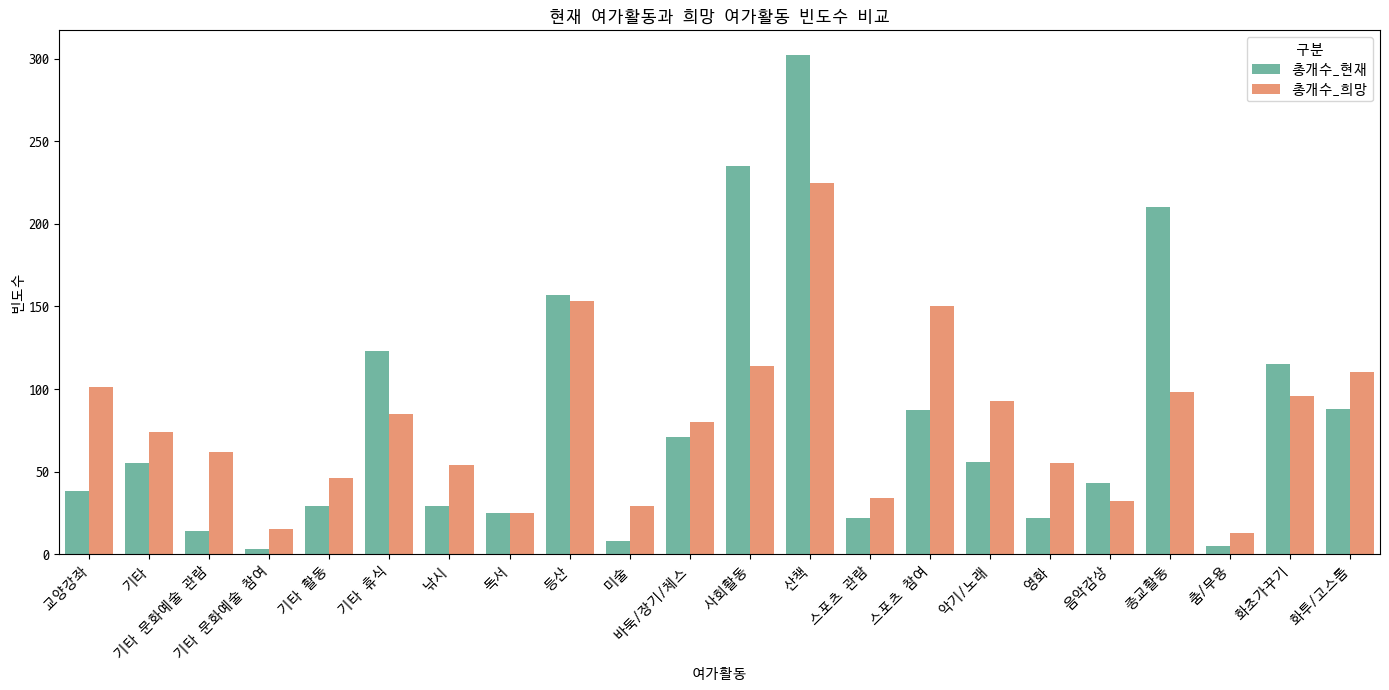

In [17]:
# 시각화
plt.figure(figsize=(14, 7))
sns.barplot(data=combined_df.melt(id_vars='여가활동', value_vars=['총개수_현재', '총개수_희망']),
            x='여가활동', y='value', hue='variable', palette='Set2')

plt.title('현재 여가활동과 희망 여가활동 빈도수 비교')
plt.xlabel('여가활동')
plt.ylabel('빈도수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='구분')
plt.tight_layout()
plt.show()

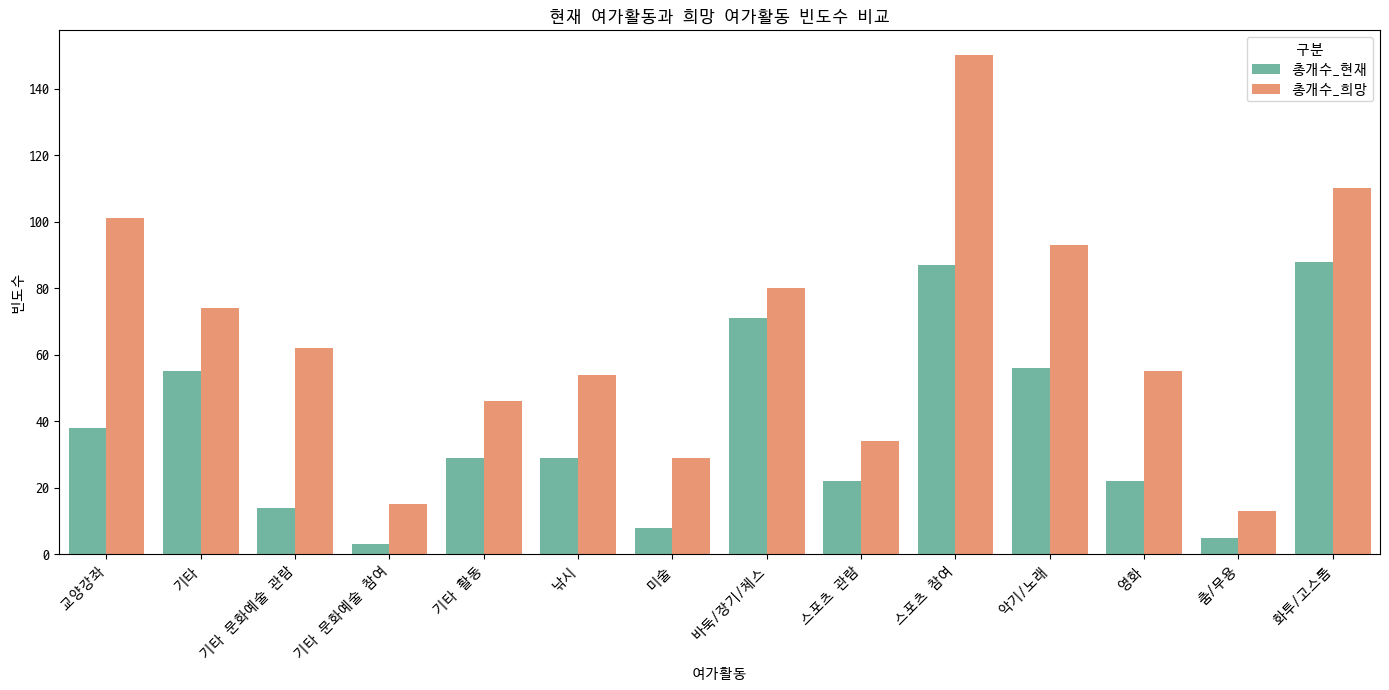

In [18]:
hope_combined_df = combined_df[combined_df['총개수_현재'] < combined_df['총개수_희망']]

# 시각화
plt.figure(figsize=(14, 7))
sns.barplot(data=hope_combined_df.melt(id_vars='여가활동', value_vars=['총개수_현재', '총개수_희망']),
            x='여가활동', y='value', hue='variable', palette='Set2')

plt.title('현재 여가활동과 희망 여가활동 빈도수 비교')
plt.xlabel('여가활동')
plt.ylabel('빈도수')
plt.xticks(rotation=45, ha='right')
plt.legend(title='구분')
plt.tight_layout()
plt.show()

# 향후 희망 여부

In [53]:
desired_act = desired_activity_df[['희망 활동_여가','희망 활동_친목','희망 활동_자원봉사', '희망 활동_학습', '희망 활동_종교', '희망 활동_정치사회', ]]

In [54]:
response_map = {
    1 : '반드시 하고 싶음',
    2 : '될 수 있으면 하고 싶음',
    3 : '기회가 되면 할 생각이 있음',
    4 : '별로 할 생각이 없음',
    5 : '전혀 할 생각이 없음',
}

response_order = ['반드시 하고 싶음', '될 수 있으면 하고 싶음', '기회가 되면 할 생각이 있음', '별로 할 생각이 없음', '전혀 할 생각이 없음']

In [55]:
desired_act.head()

,희망 활동_여가,희망 활동_친목,희망 활동_자원봉사,희망 활동_학습,희망 활동_종교,희망 활동_정치사회
5,5,2,4,3,5,5
6,2,3,2,3,1,4
7,2,3,4,4,1,4
8,3,4,4,4,4,5
60,1,3,4,4,2,5


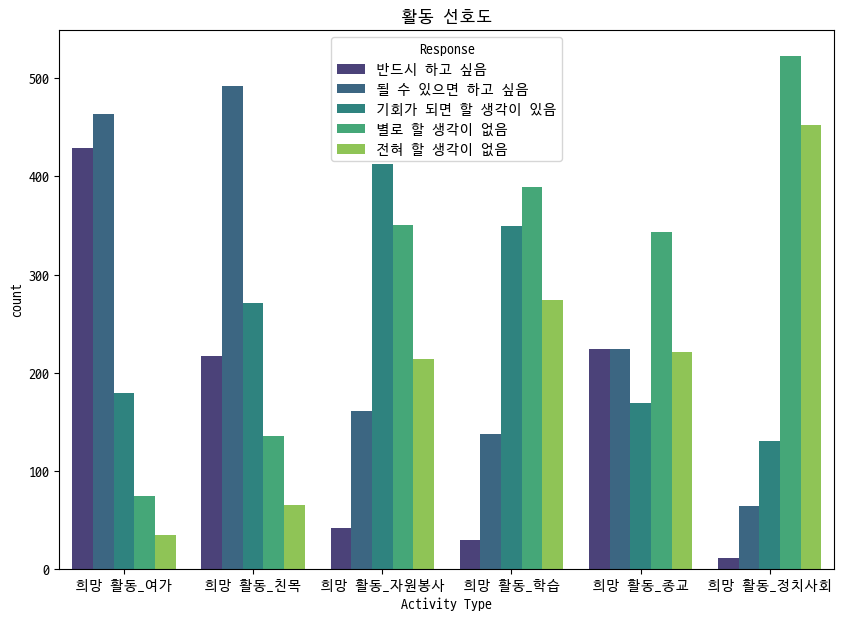

In [59]:
# Melt DataFrame for easier plotting
df_melted = desired_act.melt(var_name='Activity Type', value_name='Response')

# Apply mapping to 'Response' column
df_melted['Response'] = df_melted['Response'].map(response_map)

# Plot with mapped labels
plt.figure(figsize=(10, 7))
sns.countplot(data=df_melted, x='Activity Type',hue='Response', hue_order=response_order, palette='viridis')
plt.title('활동 선호도')
plt.legend(title='Response', loc ='best')
plt.show()